# Ch `04`: Concept `02`

## Logistic regression

Import the usual libraries, and set up the usual hyper-parameters:

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

learning_rate = 0.01
training_epochs = 1000

Set up some data to work with:

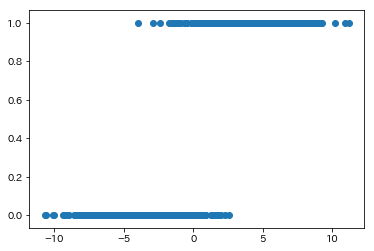

In [2]:
x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))

plt.scatter(xs, ys)

Define the placeholders, variables, model, cost function, and training op:

In [3]:
X = tf.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0.], name="parameter", trainable=True)
y_model = tf.sigmoid(w[1] * X + w[0])
cost = tf.reduce_mean(-Y * tf.log(y_model) - (1 - Y) * tf.log(1 - y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Train the logistic model on the data:

In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X: xs, Y: ys})
        if epoch % 100 == 0:
            print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, {X: xs, Y: ys})

0 0.69314593
100 0.15130295
200 0.116923474


Now let's see how well our logistic function matched the training data points:

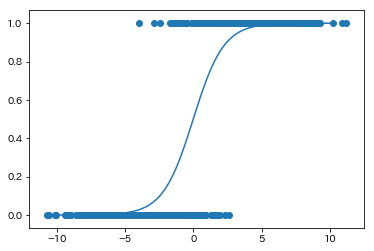

In [5]:
all_xs = np.linspace(-10, 10, 100)
with tf.Session() as sess:
    predicted_vals = sess.run(tf.sigmoid(all_xs * w_val[1] + w_val[0]))
plt.plot(all_xs, predicted_vals)
plt.scatter(xs, ys)
plt.show()

In [14]:
w_val

array([-0.00277395,  0.89813745], dtype=float32)